Start by importing the required packages and the data into a pandas dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('train.csv')
print(df.head(), '\n')

   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S   



Identify the proportions of missing data and the data types in the data frame

In [2]:
print(df.shape, '\n')
print(df.isna().sum()/df.shape[0])

(891, 12) 

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [3]:
print(df.dtypes, '\n')

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 



Convert Sex column from a categorical variable to a binary classification - Female

In [4]:
f = {'f':1, 'm':0}
df['Sex'] = df['Sex'].str[0].map(f)
df.rename(columns={'Sex':'Female'}, inplace=True)
print(df.head(), '\n')

   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Female   Age  SibSp   
0                            Braund, Mr. Owen Harris       0  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  38.0      1   
2                             Heikkinen, Miss. Laina       1  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  35.0      1   
4                           Allen, Mr. William Henry       0  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S   



Investigate numbers of passengers in each class, the number of passengers in each class with cabin details recorded, and the proportion of null cabin values by class

In [5]:
print('Passenger Count by Class: \n')
print(df['Pclass'].value_counts(), '\n')
print('Passenger Count by Class with Cabin Detail Present: \n')
print(df.groupby('Pclass')['Cabin'].count(), '\n')
print('Proportion of Cabin Information Missing by Class: \n')
print(1 - (df.groupby('Pclass')['Cabin'].count() / df['Pclass'].value_counts()), '\n')
print('Number of Unique Cabin Values: \n')
print(df['Cabin'].nunique())

Passenger Count by Class: 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64 

Passenger Count by Class with Cabin Detail Present: 

Pclass
1    176
2     16
3     12
Name: Cabin, dtype: int64 

Proportion of Cabin Information Missing by Class: 

Pclass
1    0.185185
2    0.913043
3    0.975560
dtype: float64 

Number of Unique Cabin Values: 

147


Cabin is missing for almost all 2nd and 3rd class passengers. It may be an indicator of survival within the 1st class passenger group, but let's drop it for now as
there is a large number of missing values and a large number of unique values relative to the dataframe size that may complicate encoding it.

We can also drop Passenger Id as this is an arbitary identifier with no physical meaning.


In [6]:
df = df.drop(['Cabin', 'PassengerId'], axis=1)

Women and children first? Let's investigate!

In [7]:
age_band = []
i=0
while i < len(df['Age']):
    age = df['Age'].loc[i]
    if age>=0 and age<=5:
        age_band.append('0-05')
    elif age>5 and age<=10:
        age_band.append('05-10')
    elif age>10 and age<=15:
        age_band.append('10-15')
    elif age>15 and age<=20:
        age_band.append('15-20')
    elif age>20 and age<=25:
        age_band.append('20-25')
    elif age>25 and age<=30:
        age_band.append('25-30')
    elif age>30 and age<=35:
        age_band.append('30-35')
    elif age>35 and age<=40:
        age_band.append('35-40')
    elif age>40 and age<=45:
        age_band.append('40-45')
    elif age>45 and age<=50:
        age_band.append('45-50')
    elif age>50 and age<=55:
        age_band.append('50-55')
    elif age>55 and age<=60:
        age_band.append('55-60')
    elif age>60 and age<=65:
        age_band.append('60-65')
    elif age>65 and age<=70:
        age_band.append('65-70')
    elif age>70 and age<=75:
        age_band.append('70-75')
    elif age>75 and age<=80:
        age_band.append('75-80')
    else:
        age_band.append('Unknown')
    
    i = i+1
    
df['Age_band'] = age_band
print('Number of passengers in each age band:\n', df['Age_band'].value_counts(), '\n')

Number of passengers in each age band:
 Age_band
Unknown    177
20-25      122
25-30      108
15-20       96
30-35       88
35-40       67
40-45       47
0-05        44
45-50       39
50-55       24
05-10       20
10-15       19
55-60       18
60-65       14
70-75        4
65-70        3
75-80        1
Name: count, dtype: int64 



In [8]:
x = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80','Unknown']
age_survival_chance = df[df['Survived']==1]['Age_band'].value_counts()/df['Age_band'].value_counts()

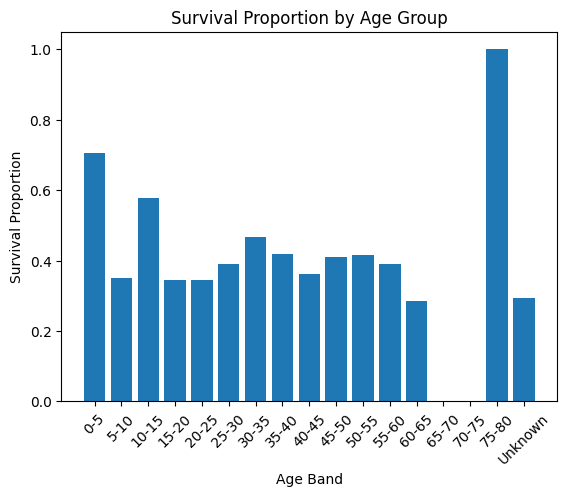

In [9]:
plt.bar(x,age_survival_chance)
plt.xticks(rotation =45)
plt.xlabel('Age Band')
plt.ylabel('Survival Proportion')
plt.title('Survival Proportion by Age Group')
plt.show()

In [10]:
u16_survival_proportion = df[df['Age']<18]['Survived'].mean()
o16_survival_proportion = df[df['Age']>=18]['Survived'].mean()
print('Proportion of children who survived: ', u16_survival_proportion, '\n')
print('Proportion of adults who survived: ', o16_survival_proportion, '\n')

Proportion of children who survived:  0.5398230088495575 

Proportion of adults who survived:  0.3810316139767055 



In [11]:
female_survival_proportion = df[df['Female']==1]['Survived'].mean()
male_survival_proportion = df[df['Female']==0]['Survived'].mean()
print('Proportion of females who survived: ', female_survival_proportion, '\n')
print('Proportion of males who survived: ', male_survival_proportion, '\n')

Proportion of females who survived:  0.7420382165605095 

Proportion of males who survived:  0.18890814558058924 



In [12]:
df_children = df[df['Age']<18]
df_adults = df[df['Age']>=18]
female_child_survival_proportion = df_children[df_children['Female']==1]['Survived'].mean()
male_child_survival_proportion = df_children[df_children['Female']==0]['Survived'].mean()
female_adult_survival_proportion = df_adults[df_adults['Female']==1]['Survived'].mean()
male_adult_survival_proportion = df_adults[df_adults['Female']==0]['Survived'].mean()
print('Proportion of female children who survived: ', female_child_survival_proportion, '\n')
print('Proportion of male children who survived: ', male_child_survival_proportion, '\n')
print('Proportion of female adults who survived: ', female_adult_survival_proportion, '\n')
print('Proportion of male adults who survived: ', male_adult_survival_proportion, '\n')

Proportion of female children who survived:  0.6909090909090909 

Proportion of male children who survived:  0.39655172413793105 

Proportion of female adults who survived:  0.7718446601941747 

Proportion of male adults who survived:  0.17721518987341772 



Who were the passengers?

In [13]:
strings = df['Name'].str.split(",")
titles=[]
for substring in strings:
    step = substring[1].split(".")
    titles.append(step[0][1:])  

In [14]:
titles_df = pd.DataFrame(titles)

In [15]:
titles_df.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Name: count, dtype: int64

Let's clean up the data for use in a logistic regression model

First we'll drop the 'Age_band' column as this has served its purpose and just duplicates information from the age column

In [16]:
df = df.drop(['Age_band'], axis=1)

Next let's simplify the the titles we found into just 4 groups, drop the name column and replace it with encoded columns of the titles

In [17]:
simplified_titles = []
i=0
for title in titles:
    if title in ['Rev', 'Major', 'Col', 'Capt', 'Sir', 'Don', 'Jonkheer']:
        simplified_title = 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        simplified_title = 'Mrs'    
    elif title in ['Ms', 'Mlle']:
        simplified_title = 'Miss'
    elif title in ['Dr']:
        if df['Female'].loc[i] == False:
            simplified_title = 'Mr'
        else:
            simplified_title = 'Mrs'
    else:
        simplified_title = title
    simplified_titles.append(simplified_title)
    i = i + 1
    
df['Title'] = simplified_titles

In [18]:
df = df.drop(['Name'], axis=1)
title_dummies = pd.get_dummies(df['Title'])
df['title_Mr'] = title_dummies['Mr']
df['title_Mrs'] = title_dummies['Mrs']
df['title_Miss'] = title_dummies['Miss']
df['title_Master'] = title_dummies['Master']
df = df.drop(['Title'], axis=1)

Let's handle the nulls in the Embarked column by filling them with the most column value, and then encode the embarked values dropping the original column

In [19]:
print(df['Embarked'].value_counts(), '\n')
print('Number of null values in Embarked column: ', df['Embarked'].isna().sum(),'\n')
df['Embarked'] = df['Embarked'].fillna(value = 'S')

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64 

Number of null values in Embarked column:  2 



In [20]:
dummy_embarked = pd.get_dummies(df['Embarked'])
df['Embarked_C'] = dummy_embarked['C']
df['Embarked_Q'] = dummy_embarked['Q']
df['Embarked_S'] = dummy_embarked['S']
df = df.drop(['Embarked'], axis=1)

Let's fill the absent age values with the median age, but create a new column recording which ages had been missing

In [21]:
age_null = df['Age'].isna()
df['Age_Absent'] = age_null
df['Age'] = df['Age'].fillna(value = df['Age'].median())

Let's split the ticket component to get the numeric ticket suffixes, then use that to work out the fare per person by dividing the ticket fare by the number of people using that ticket. We can then drop the ticket columns as the numeric component is not ordinal and there are a large number of unique values that would give us too many columns if encoded.

In [22]:
tickets = df['Ticket'].str.split(" ")
ticket_suffix = [splits[-1] if len(splits) >= 2 else '' if splits[0] == 'LINE' else splits[0] for splits in tickets]
df['TicketSuffixes'] = ticket_suffix
df = df.drop(['Ticket'], axis=1)
df['TicketSuffix'] = pd.to_numeric(df['TicketSuffixes'])
df = df.drop(['TicketSuffixes'], axis=1)
df['TicketSuffix'] = df['TicketSuffix'].fillna(value = 0)

ticket_fares_per_person = []
i = 0
while i<len(df['TicketSuffix']):
    fare = df['Fare'].loc[i]
    suffix = df['TicketSuffix'].loc[i]
    number_of_people = df[df['TicketSuffix']==suffix]['TicketSuffix'].count()
    fare_per_person = fare/number_of_people
    ticket_fares_per_person.append(fare_per_person)
    i = i + 1
    
df['Fare_per_person'] = ticket_fares_per_person
df = df.drop(['TicketSuffix'], axis = 1)
df.head()

,Survived,Pclass,Female,Age,SibSp,Parch,Fare,title_Mr,title_Mrs,title_Miss,title_Master,Embarked_C,Embarked_Q,Embarked_S,Age_Absent,Fare_per_person
0,0,3,0,22.0,1,0,7.2500,True,False,False,False,False,False,True,False,7.2500
1,1,1,1,38.0,1,0,71.2833,False,True,False,False,True,False,False,False,71.2833
2,1,3,1,26.0,0,0,7.9250,False,False,True,False,False,False,True,False,7.9250
3,1,1,1,35.0,1,0,53.1000,False,True,False,False,False,False,True,False,26.5500
4,0,3,0,35.0,0,0,8.0500,True,False,False,False,False,False,True,False,8.0500


Look at the correlation heatmap to see relationships between features

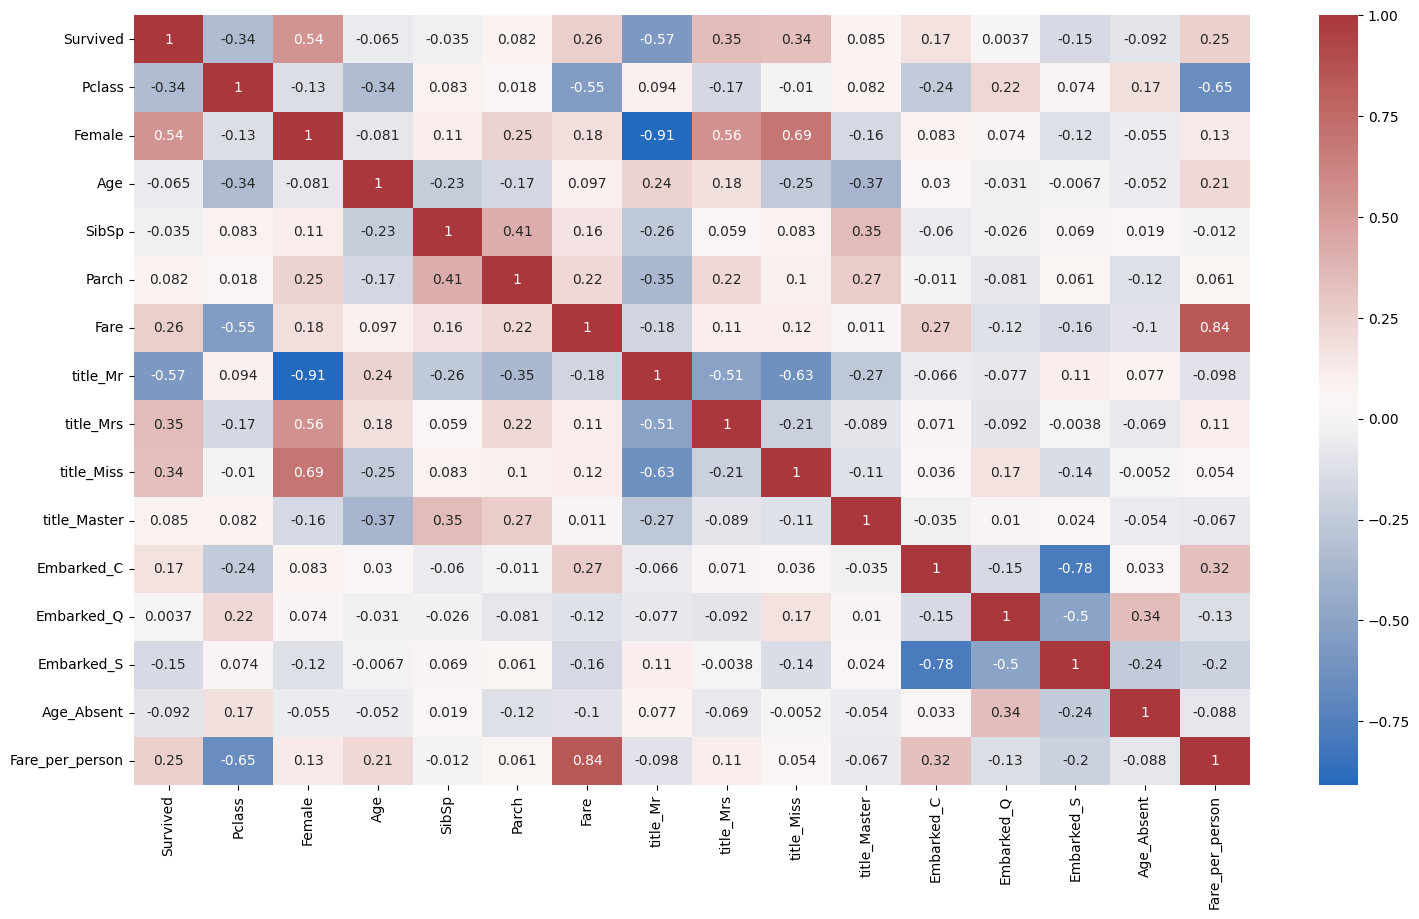

In [23]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), cmap = 'vlag', annot = True)
plt.show()

Split the data into a test and train set, scale the data, and fit a logistic regression model using the training data. Then create predictions and evaluate the training and test accuracy scores

In [24]:
train, test = train_test_split(df, random_state=42, test_size=0.3)
features = [x for x in list(train.columns) if x not in ['Survived']]

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(train[features], train['Survived'])

y_train = pipe.predict(train[features])
y_test = pipe.predict(test[features])

train_accuracy = accuracy_score(train['Survived'], y_train)
test_accuracy = accuracy_score(test['Survived'], y_test)
print('Train Accuracy Score:', train_accuracy, '\n')
print('Test Accuracy Score:', test_accuracy, '\n')

train_confusion_matrix = confusion_matrix(train['Survived'], y_train) 
test_confusion_matrix = confusion_matrix(test['Survived'], y_test)
print('Training Confusion Matrix: \n', train_confusion_matrix, '\n')
print('Test Confusion Matrix: \n', test_confusion_matrix)

Train Accuracy Score: 0.8314606741573034 

Test Accuracy Score: 0.832089552238806 

Training Confusion Matrix: 
 [[347  45]
 [ 60 171]] 

Test Confusion Matrix: 
 [[136  21]
 [ 24  87]]


Logistic Regression Feature Coefficients

                 Coefficient
Female              0.484980
title_Mrs           0.478951
title_Master        0.450793
title_Miss          0.162478
Fare                0.157348
Embarked_C          0.133793
Fare_per_person     0.093158
Embarked_Q          0.061322
Embarked_S         -0.155043
Age_Absent         -0.166851
Age                -0.221234
Parch              -0.296549
SibSp              -0.613545
Pclass             -0.667475
title_Mr           -0.672112


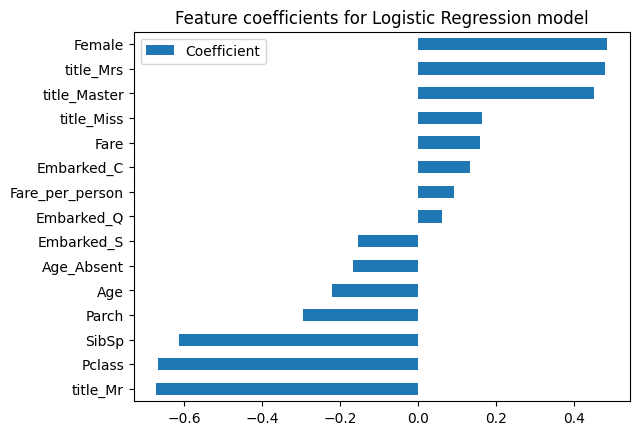

In [25]:
lr_importances = pd.DataFrame(data=pipe.steps[1][1].coef_[0], index = features,columns=['Coefficient'])
lr_importances = lr_importances.sort_values(by = 'Coefficient')
print(lr_importances.sort_values(by = 'Coefficient', ascending = False))
lr_importances.plot.barh()
plt.title('Feature coefficients for Logistic Regression model')
plt.show()